## ML Classification

#### Table of Contents

* [Preliminaries](#Perliminaries)
* [Naive Bayes](#Naive-Bayes)
* [KNN Classification](#KNN-Classification)
* [KNN Regression](#KNN-Regression)

***
# Preliminaries
[TOP](#ML-Classification)

We are going to set up our data to predict `urate_bin`. 
After showing how to use KNN for classification, we will take a quick tangent for regression.

In [1]:
import pandas as pd

import sklearn.naive_bayes as nb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler

import matplotlib.pyplot as plt

In [2]:
df = pd.read_pickle('C:/Users/hubst/Econ490_group/class_data.pkl')

In [7]:
df_prepped = df.drop(columns = ['year', 'GeoName']).join([
    pd.get_dummies(df.year, drop_first = False)    
])

Whenever we are dealing with categorical variables that we have not predefined dummy variables, we need to ensure that they have the same labels after train-test splits. We can do so with setting the variable to a `category` type, or we can use `sklearn`'s `LabelEncoder()`.

In [8]:
le = LabelEncoder().fit(df_prepped['urate_bin'].unique())
y = le.transform(df_prepped['urate_bin'])
x = df_prepped.drop(columns = 'urate_bin')

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 2/3, random_state = 490)

In [9]:
le.inverse_transform([0 ,0 ,1, 2, 1])

array(['higher', 'higher', 'lower', 'similar', 'lower'], dtype=object)

******************************
# Naive Bayes 
[TOP](#ML-Classification)

Implementing Naive Bayes is perhaps one of the easiest we will use all semester. 
There are no hyperparameters to tune.
Because of the structure of our data, we want the Gaussian Naive Bayes.
Note that there are other specifications for different tasks: https://scikit-learn.org/stable/modules/naive_bayes.html

0.49081333413130646


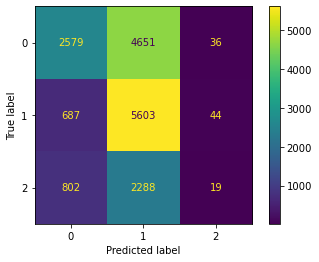

In [10]:
gnb = nb.GaussianNB()
gnb.fit(x_train, y_train)

print(gnb.score(x_test, y_test))

plot_confusion_matrix(gnb, x_test, y_test)
plt.show()

As you have notiecd, when we use the `LabelEncoder()` from `sklearn`, the label is converted to numbers. 
I prefer seeing the labels.

In [11]:
y = df_prepped['urate_bin'].astype('category').cat.set_categories(['lower', 'similar', 'higher'])
x = df_prepped.drop(columns = 'urate_bin')

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 2/3, random_state = 490)

Just to show you that the categories are preserved...

In [12]:
y_train.iloc[0:2]

fips   year
55033  2005    higher
8039   2010     lower
Name: urate_bin, dtype: category
Categories (3, object): ['lower', 'similar', 'higher']

0.49081333413130646


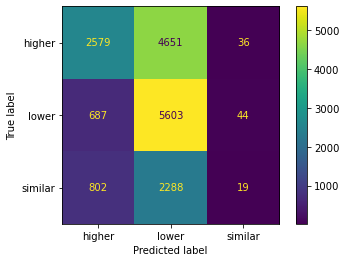

In [13]:
gnb = nb.GaussianNB()
gnb.fit(x_train, y_train)

print(gnb.score(x_test, y_test))

plot_confusion_matrix(gnb, x_test, y_test)
plt.show()

*********
# KNN Classification
[TOP](#ML-Classification)

As you can find from the documentation, there are more hyperparameters than the number of neighbors you can choose.
For our purposes, we will only focus on the number of neighbors as the rest are more advanced. 
I do, however, encourage you to learn more about them!

Don't forget to standardize!

In [14]:
ss = StandardScaler()
x_train_std = pd.DataFrame(ss.fit(x_train).transform(x_train),
                           columns = x_train.columns,
                           index = x_train.index)

x_test_std = pd.DataFrame(StandardScaler().fit(x_test).transform(x_test),
                          columns = x_test.columns, 
                          index = x_test.index)

0.6388174037943624


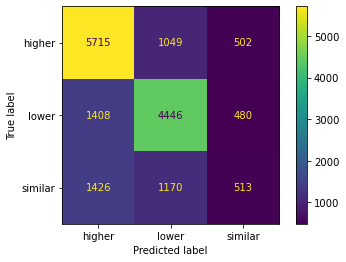

In [15]:
knnc = KNeighborsClassifier(n_neighbors = 5)
knnc.fit(x_train_std, y_train)

print(knnc.score(x_test_std, y_test))

plot_confusion_matrix(knnc, x_test_std, y_test)
plt.show()

*********
# KNN Regression
[TOP](#ML-Classification)

Because we have introduced KNN for classification, I would be remissed if I did not show you how to perform KNN regression.

In [16]:
knnr = KNeighborsRegressor(n_neighbors = 7)
knnr.fit(x_train_std.drop(columns = 'pct_d_rgdp'), x_train_std['pct_d_rgdp'])

KNeighborsRegressor(n_neighbors=7)

Tired of writing the RMSE formula manually? `sklearn` has a function for you: `mean_squared_error()`!

In [17]:
yhat = knnr.predict(x_test_std.drop(columns = 'pct_d_rgdp'))
mean_squared_error(x_test_std['pct_d_rgdp'], yhat, squared = False)

1.0079631023239946